# Reading in the Web Scraped Data to create a Table

Importing Modules

In [27]:
import pandas as pd
import numpy as np

In [2]:
import re

In [3]:
from helper_functions import convert_to_number_with_null

nan


In [4]:
from helper_functions import distance_conversion

Reading Each of the 10 tables that were webscraped from VRBO and Combining them for one larger table

In [5]:
page_1 = pd.read_csv('table2_1').T[1:]
page_2 = pd.read_csv('table2_2').T[1:]
page_3 = pd.read_csv('table2_3').T[1:]
page_4 = pd.read_csv('table2_4').T[1:]
page_5 = pd.read_csv('table2_5').T[1:]
page_6 = pd.read_csv('table2_6').T[1:]
page_7 = pd.read_csv('table2_7').T[1:]
page_8 = pd.read_csv('table2_8').T[1:]
page_9 = pd.read_csv('table2_9').T[1:]
page_10 = pd.read_csv('table2_10').T[1:]

In [6]:
rental_table = pd.concat([page_1, page_2, page_3, page_4, page_5, page_6, page_7, page_8, page_9, page_10], ignore_index=True)

In [7]:
rental_table

,0,1,2,3,4,5,6,7
0,$643avg/night,House,5 BR,5 BA,NaN,Sleeps 14,3 min walk to the beach,(3)
1,$450avg/night,Townhome,5 BR,4 BA,1 HF BA,Sleeps 10,11 min walk to the beach,(19)
2,$180avg/night,Condo,3 BR,1 BA,NaN,Sleeps 8,0.4 mi to Avalon center,(58)
3,$357avg/night,Condo,3 BR,2 BA,NaN,Sleeps 8,13 min walk to the beach,(8)
4,$432avg/night,House,4 BR,3 BA,NaN,Sleeps 10,5 min walk to the beach,(5)
...,...,...,...,...,...,...,...,...
495,$171avg/night,Condo,2 BR,1 BA,NaN,Sleeps 6,NaN,(9)
496,$286avg/night,Condo,3 BR,2 BA,NaN,Sleeps 10,NaN,(13)
497,$320avg/night,Condo,4 BR,NaN,NaN,Sleeps 10,NaN,(21)
498,$410avg/night,Townhome,4 BR,3 BA,NaN,Sleeps 10,NaN,(33)


In [8]:
rental_table.columns=['price', 'type', 'bedrooms', 'full_baths', 'half_baths', 'sleeps', 'distance', 'reviews']

In [9]:
rental_table.head(50)

,price,type,bedrooms,full_baths,half_baths,sleeps,distance,reviews
0,$643avg/night,House,5 BR,5 BA,NaN,Sleeps 14,3 min walk to the beach,(3)
1,$450avg/night,Townhome,5 BR,4 BA,1 HF BA,Sleeps 10,11 min walk to the beach,(19)
2,$180avg/night,Condo,3 BR,1 BA,NaN,Sleeps 8,0.4 mi to Avalon center,(58)
3,$357avg/night,Condo,3 BR,2 BA,NaN,Sleeps 8,13 min walk to the beach,(8)
4,$432avg/night,House,4 BR,3 BA,NaN,Sleeps 10,5 min walk to the beach,(5)
5,$550avg/night,House,6 BR,5 BA,1 HF BA,Sleeps 14,0.4 mi to Avalon center,(18)
6,$200avg/night,Townhome,4 BR,3 BA,NaN,Sleeps 9,0.6 mi to Avalon center,(61)
7,$900avg/night,Townhome,5 BR,5 BA,NaN,Sleeps 12,0.3 mi to Avalon center,(20)
8,$379avg/night,Townhome,4 BR,2 BA,NaN,Sleeps 10,11 min walk to the beach,(41)
9,$627avg/night,Townhome,4 BR,3 BA,NaN,Sleeps 10,On the beach,(68)


In [10]:
rental_table.type.unique()

array(['House', 'Townhome', 'Condo', 'Cottage', 'Apartment', 'Bungalow',
       'Chateau / Country House'], dtype=object)

Using the imported functions to help change the cell information into numerical values

In [11]:
rental_table['bedrooms'] = rental_table.bedrooms.apply(convert_to_number_with_null)

In [12]:
rental_table['full_baths'] = rental_table.full_baths.apply(convert_to_number_with_null)

In [13]:
rental_table['half_baths'] = rental_table.half_baths.apply(convert_to_number_with_null)

In [14]:
rental_table['sleeps'] = rental_table.sleeps.apply(convert_to_number_with_null)

In [15]:
rental_table['reviews'] = rental_table.reviews.apply(convert_to_number_with_null)

In [16]:
rental_table.price.unique()

array(['$643avg/night', '$450avg/night', '$180avg/night', '$357avg/night',
       '$432avg/night', '$550avg/night', '$200avg/night', '$900avg/night',
       '$379avg/night', '$627avg/night', '$210avg/night', '$336avg/night',
       '$405avg/night', '$375avg/night', '$675avg/night', '$215avg/night',
       '$230avg/night', '$189avg/night', '$300avg/night', '$737avg/night',
       '$1,200avg/night', '$575avg/night', '$882avg/night',
       '$1,648avg/night', '$1,500avg/night', '$386avg/night',
       '$400avg/night', '$250avg/night', '$350avg/night', '$360avg/night',
       '$750avg/night', '$1,368avg/night', '$1,425avg/night',
       '$1,295avg/night', '$600avg/night', '$553avg/night',
       '$1,395avg/night', '$483avg/night', '$439avg/night',
       '$520avg/night', '$571avg/night', '$310avg/night', '$429avg/night',
       '$1,490avg/night', '$288avg/night', '$371avg/night',
       '$850avg/night', '$290avg/night', '$485avg/night',
       '$1,139avg/night', '$679avg/night', '$2,500avg

In [17]:
rental_table['price'] = rental_table.price.apply(convert_to_number_with_null)

In [18]:
rental_table['bathrooms'] = rental_table['full_baths'] + .5*rental_table['half_baths']

In [19]:
rental_table.tail(50)

,price,type,bedrooms,full_baths,half_baths,sleeps,distance,reviews,bathrooms
450,585,House,7,3,0,15,NaN,39,3.0
451,170,Condo,1,1,0,5,NaN,23,1.0
452,700,House,5,4,1,12,NaN,15,4.5
453,502,House,5,3,0,14,NaN,16,3.0
454,375,Townhome,4,2,1,8,NaN,5,2.5
455,445,Townhome,4,2,1,8,NaN,5,2.5
456,527,Townhome,5,3,1,12,NaN,16,3.5
457,131,Condo,1,1,0,4,NaN,19,1.0
458,350,Townhome,4,0,0,1,NaN,8,0.0
459,375,Condo,3,2,0,10,NaN,8,2.0


In [20]:
rental_table['distance'] = rental_table.distance.apply(distance_conversion)

In [21]:
rental_table.distance.unique()

array([ 3., 11., nan, 13.,  5.,  0.,  8.,  2.,  4.,  1., 10., 12.,  7.,
        9.,  6., 22., 14., 19., 15.])

In [22]:
rental_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       500 non-null    int64  
 1   type        500 non-null    object 
 2   bedrooms    500 non-null    int64  
 3   full_baths  500 non-null    int64  
 4   half_baths  500 non-null    int64  
 5   sleeps      500 non-null    int64  
 6   distance    388 non-null    float64
 7   reviews     500 non-null    int64  
 8   bathrooms   500 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 35.3+ KB


In [23]:
rental_table.describe()

,price,bedrooms,full_baths,half_baths,sleeps,distance,reviews,bathrooms
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,388.000000,500.000000,500.000000
mean,2.000359e+06,3.282000,2.086000,0.290000,9.074000,4.373711,17.702000,2.231000
std,4.472134e+07,1.235122,0.982106,0.492326,2.961429,3.523568,13.851242,1.079105
min,7.500000e+01,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2.360000e+02,3.000000,2.000000,0.000000,8.000000,2.000000,8.000000,2.000000
50%,3.100000e+02,3.000000,2.000000,0.000000,9.000000,4.000000,15.000000,2.000000
75%,4.252500e+02,4.000000,3.000000,1.000000,10.000000,6.000000,24.000000,3.000000
max,1.000000e+09,7.000000,6.000000,2.000000,22.000000,22.000000,98.000000,6.500000


In [24]:
rental_table = rental_table[rental_table['price'] < 5000]

In [25]:
rental_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       499 non-null    int64  
 1   type        499 non-null    object 
 2   bedrooms    499 non-null    int64  
 3   full_baths  499 non-null    int64  
 4   half_baths  499 non-null    int64  
 5   sleeps      499 non-null    int64  
 6   distance    388 non-null    float64
 7   reviews     499 non-null    int64  
 8   bathrooms   499 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 39.0+ KB


In [26]:
rental_table.describe()

,price,bedrooms,full_baths,half_baths,sleeps,distance,reviews,bathrooms
count,499.000000,499.000000,499.000000,499.000000,499.000000,388.000000,499.000000,499.000000
mean,359.961924,3.278557,2.084168,0.290581,9.058116,4.373711,17.735471,2.229459
std,230.391209,1.233958,0.982237,0.492648,2.943004,3.523568,13.844887,1.079637
min,75.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,236.000000,3.000000,2.000000,0.000000,8.000000,2.000000,8.000000,2.000000
50%,310.000000,3.000000,2.000000,0.000000,9.000000,4.000000,15.000000,2.000000
75%,425.000000,4.000000,3.000000,1.000000,10.000000,6.000000,24.000000,3.000000
max,2500.000000,7.000000,6.000000,2.000000,22.000000,22.000000,98.000000,6.500000


Using EDA and correlations to further understand the table

In [30]:
rental_table.corr()

,price,bedrooms,full_baths,half_baths,sleeps,distance,reviews,bathrooms
price,1.000000,0.616814,0.590466,0.287038,0.508531,-0.043192,-0.220366,0.602686
bedrooms,0.616814,1.000000,0.697985,0.312512,0.823287,0.105912,-0.145070,0.706317
full_baths,0.590466,0.697985,1.000000,0.289631,0.654050,0.032360,-0.130959,0.975865
half_baths,0.287038,0.312512,0.289631,1.000000,0.239010,-0.032494,-0.148864,0.491657
sleeps,0.508531,0.823287,0.654050,0.239010,1.000000,0.100585,-0.097546,0.649576
distance,-0.043192,0.105912,0.032360,-0.032494,0.100585,1.000000,-0.042516,0.021742
reviews,-0.220366,-0.145070,-0.130959,-0.148864,-0.097546,-0.042516,1.000000,-0.153108
bathrooms,0.602686,0.706317,0.975865,0.491657,0.649576,0.021742,-0.153108,1.000000


In [31]:
import seaborn as sns

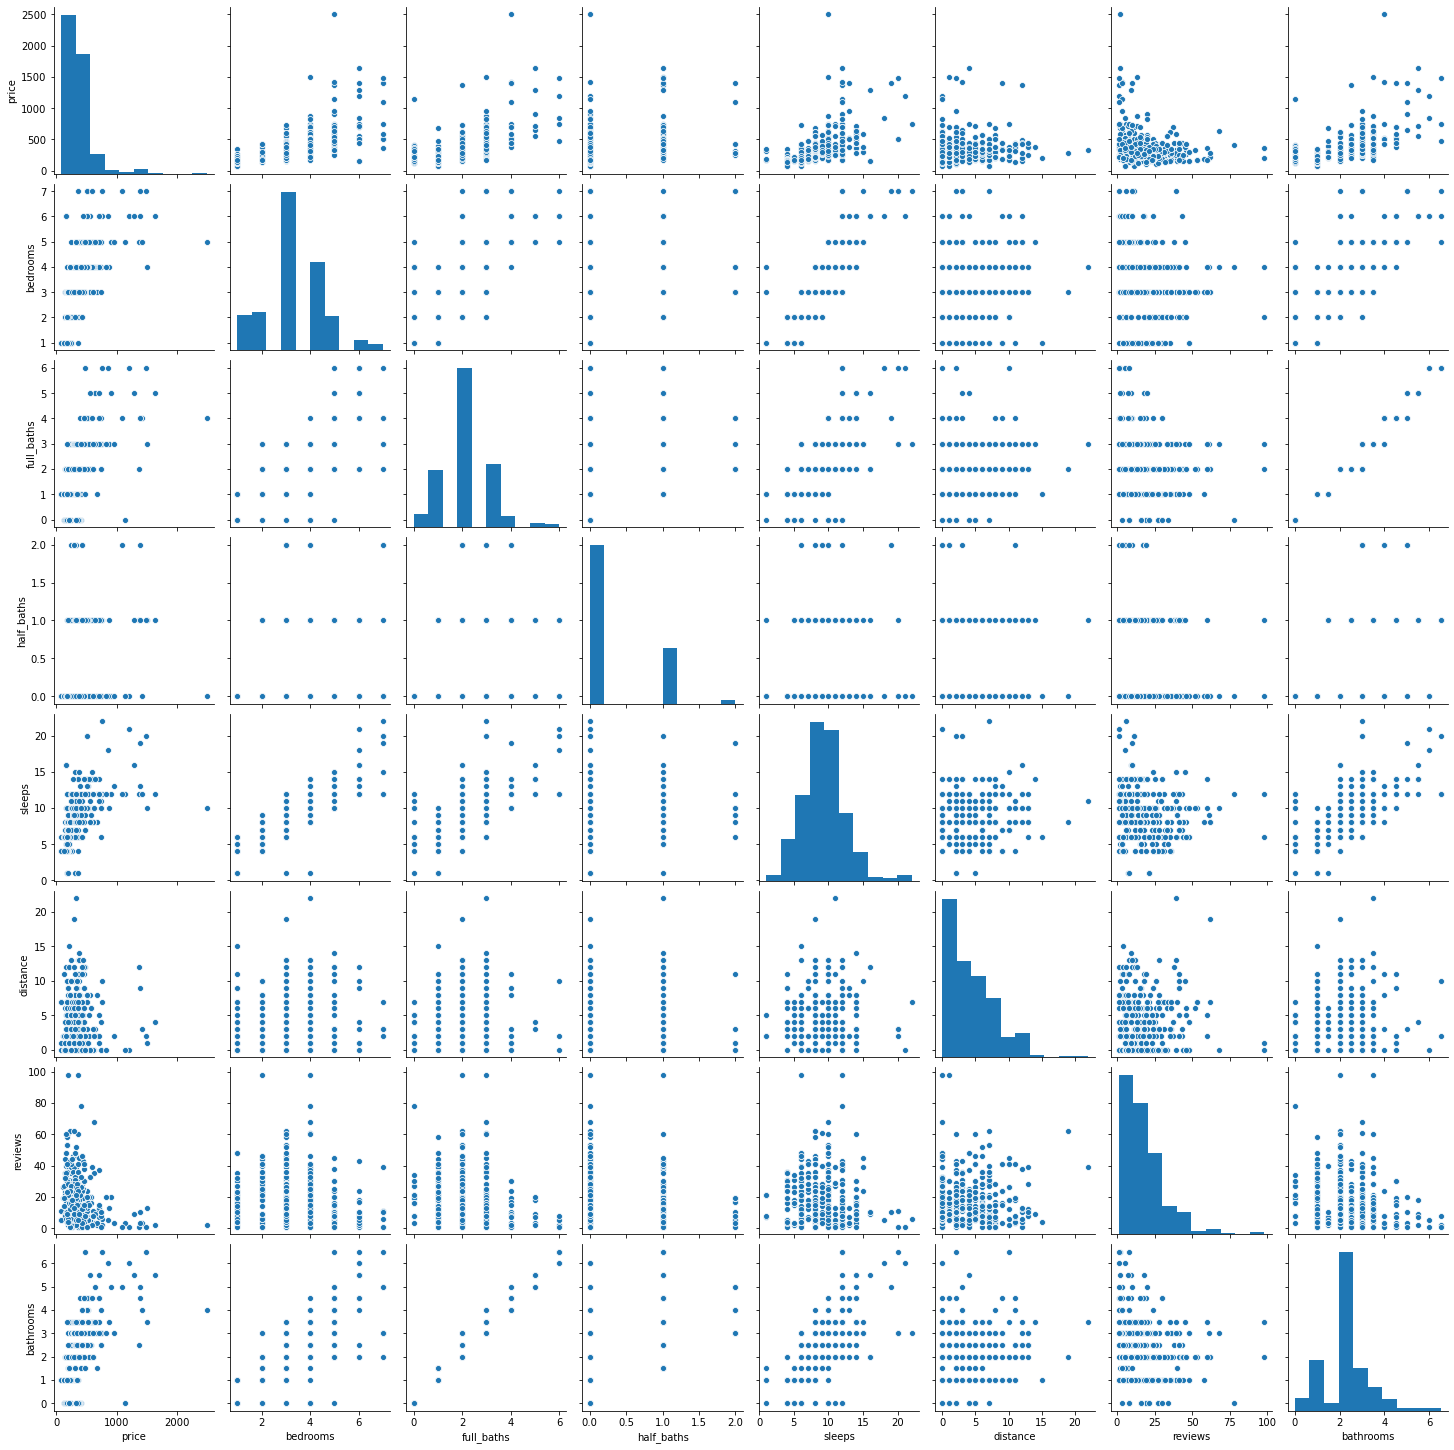

In [32]:
sns.pairplot(rental_table)

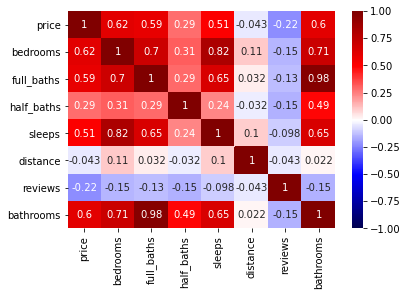

In [34]:
sns.heatmap(rental_table.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [35]:
rental_table.groupby('type')[['price', 'bedrooms', 'sleeps', 'distance', 'bathrooms']].mean()

,price,bedrooms,sleeps,distance,bathrooms
type,,,,,
Apartment,269.210526,2.421053,6.842105,5.705882,1.236842
Bungalow,221.000000,2.000000,4.000000,NaN,1.000000
Chateau / Country House,328.000000,5.000000,12.000000,NaN,2.000000
Condo,283.778523,2.751678,8.161074,3.992095,1.827181
Cottage,316.750000,2.750000,4.500000,4.333333,1.875000
House,554.076190,4.371429,11.114286,4.794118,3.000000
Townhome,423.114286,4.114286,10.642857,5.340426,3.100000


Removing Null Values for Distance

In [36]:
rental_table.dropna(subset=['distance'], inplace=True)

<ipython-input-36-cc8ef5ebedc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rental_table.dropna(subset=['distance'], inplace=True)


In [37]:
rental_table = rental_table.reset_index()

In [38]:
rental_table

,index,price,type,bedrooms,full_baths,half_baths,sleeps,distance,reviews,bathrooms
0,0,643,House,5,5,0,14,3.0,3,5.0
1,1,450,Townhome,5,4,1,10,11.0,19,4.5
2,3,357,Condo,3,2,0,8,13.0,8,2.0
3,4,432,House,4,3,0,10,5.0,5,3.0
4,8,379,Townhome,4,2,0,10,11.0,41,2.0
...,...,...,...,...,...,...,...,...,...,...
383,444,279,Condo,3,2,0,9,2.0,17,2.0
384,446,329,Townhome,3,2,0,7,9.0,15,2.0
385,447,300,House,4,3,1,10,3.0,18,3.5
386,448,456,Condo,3,2,1,10,6.0,4,2.5


In [39]:
rental_table = rental_table.drop(['index'], axis=1)

Looking at how that changes the correlation table

In [41]:
rental_table.corr()

,price,bedrooms,full_baths,half_baths,sleeps,distance,reviews,bathrooms
price,1.000000,0.642460,0.583138,0.276845,0.542047,-0.043192,-0.203714,0.596760
bedrooms,0.642460,1.000000,0.720667,0.286001,0.836395,0.105912,-0.129807,0.724161
full_baths,0.583138,0.720667,1.000000,0.264442,0.654615,0.032360,-0.057433,0.973376
half_baths,0.276845,0.286001,0.264442,1.000000,0.209916,-0.032494,-0.124124,0.478456
sleeps,0.542047,0.836395,0.654615,0.209916,1.000000,0.100585,-0.095919,0.645935
distance,-0.043192,0.105912,0.032360,-0.032494,0.100585,1.000000,-0.042516,0.021742
reviews,-0.203714,-0.129807,-0.057433,-0.124124,-0.095919,-0.042516,1.000000,-0.081795
bathrooms,0.596760,0.724161,0.973376,0.478456,0.645935,0.021742,-0.081795,1.000000


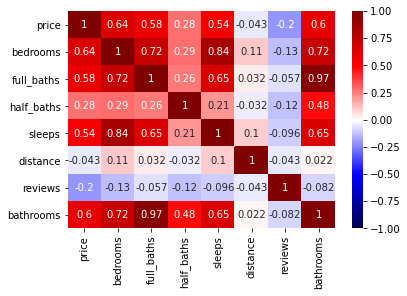

In [42]:
sns.heatmap(rental_table.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1)

In [43]:
rental_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       388 non-null    int64  
 1   type        388 non-null    object 
 2   bedrooms    388 non-null    int64  
 3   full_baths  388 non-null    int64  
 4   half_baths  388 non-null    int64  
 5   sleeps      388 non-null    int64  
 6   distance    388 non-null    float64
 7   reviews     388 non-null    int64  
 8   bathrooms   388 non-null    float64
dtypes: float64(2), int64(6), object(1)
memory usage: 27.4+ KB


Removing any Duplicate Rows

In [45]:
rental_table['duplicate'] = rental_table.duplicated()

In [46]:
rental_table = rental_table[rental_table['duplicate'] == False].reset_index()

In [47]:
rental_table.drop('index', axis=1, inplace=True)
rental_table

,price,type,bedrooms,full_baths,half_baths,sleeps,distance,reviews,bathrooms,duplicate
0,643,House,5,5,0,14,3.0,3,5.0,False
1,450,Townhome,5,4,1,10,11.0,19,4.5,False
2,357,Condo,3,2,0,8,13.0,8,2.0,False
3,432,House,4,3,0,10,5.0,5,3.0,False
4,379,Townhome,4,2,0,10,11.0,41,2.0,False
...,...,...,...,...,...,...,...,...,...,...
275,207,Condo,1,1,0,6,15.0,4,1.0,False
276,825,Condo,4,3,0,12,0.0,20,3.0,False
277,329,Townhome,3,2,0,7,9.0,15,2.0,False
278,300,House,4,3,1,10,3.0,18,3.5,False


In [48]:
rental_table.describe()

,price,bedrooms,full_baths,half_baths,sleeps,distance,reviews,bathrooms
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,358.646429,3.242857,2.064286,0.278571,8.928571,4.528571,18.317857,2.203571
std,228.736815,1.211483,0.966913,0.479962,2.924726,3.723302,14.923546,1.060696
min,75.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,236.750000,3.000000,2.000000,0.000000,7.000000,2.000000,7.750000,2.000000
50%,300.000000,3.000000,2.000000,0.000000,8.000000,4.000000,15.000000,2.000000
75%,425.000000,4.000000,3.000000,1.000000,10.000000,7.000000,25.250000,3.000000
max,1648.000000,7.000000,6.000000,2.000000,22.000000,22.000000,98.000000,6.500000


Looking for Outliers in the target variable to remove them

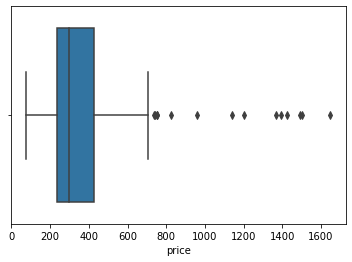

In [49]:
sns.boxplot(rental_table['price'])

In [50]:
rents = rental_table[rental_table['price'] < 1000].reset_index()

In [53]:
rents.drop('index', axis=1, inplace=True)

In [54]:
rents

,price,type,bedrooms,full_baths,half_baths,sleeps,distance,reviews,bathrooms,duplicate
0,643,House,5,5,0,14,3.0,3,5.0,False
1,450,Townhome,5,4,1,10,11.0,19,4.5,False
2,357,Condo,3,2,0,8,13.0,8,2.0,False
3,432,House,4,3,0,10,5.0,5,3.0,False
4,379,Townhome,4,2,0,10,11.0,41,2.0,False
...,...,...,...,...,...,...,...,...,...,...
267,207,Condo,1,1,0,6,15.0,4,1.0,False
268,825,Condo,4,3,0,12,0.0,20,3.0,False
269,329,Townhome,3,2,0,7,9.0,15,2.0,False
270,300,House,4,3,1,10,3.0,18,3.5,False


In [55]:
rents.describe()

,price,bedrooms,full_baths,half_baths,sleeps,distance,reviews,bathrooms
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,328.147059,3.176471,2.014706,0.268382,8.779412,4.547794,18.757353,2.148897
std,143.140425,1.155014,0.875963,0.476023,2.754912,3.709656,14.902634,0.968545
min,75.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,235.750000,3.000000,2.000000,0.000000,7.000000,2.000000,8.000000,2.000000
50%,300.000000,3.000000,2.000000,0.000000,8.000000,4.000000,15.000000,2.000000
75%,387.750000,4.000000,2.000000,1.000000,10.000000,7.000000,26.000000,3.000000
max,960.000000,7.000000,6.000000,2.000000,22.000000,22.000000,98.000000,6.500000


Convering this to a new csv file with the cleaned dataframe ready for modeling

In [56]:
rents.to_csv('Rental_Table.csv')